In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use("classic")

## Reading ,merging  and understanding the required dataset

df1=pd.read_csv('Customer_and_bank details_p1.csv')
df2=pd.read_csv('Customer_campaign_details_p1.csv')
df3=pd.read_csv('Customer_Postal_Code_details.csv')
df4=pd.read_csv('Customer_Response_data_p1.csv')
df5=pd.read_csv('Customer_social_economic_data_p1.csv')
region=pd.read_csv("Region_code_master.csv")
city=pd.read_csv("City_Master.csv")
state=pd.read_csv("State_Master.csv")
df3=df3.rename({'customer_id':'Customer_id'},axis='columns')
df6=pd.merge(df1,df2, on='Customer_id', how='inner')
df7=pd.merge(df4,df5, on='Customer_id', how='inner')
df8=pd.merge(df6,df7, on='Customer_id', how='inner')
df=pd.merge(df8,df3,on='Customer_id' ,how='inner')
df=pd.merge(df,state,on='State_Code')
df=pd.merge(df,city,on='City_Code')
df=df.drop(['State_Code_y','Region_Code_y'],axis=1)
df=df.rename({'Region_Code_x':'Region_Code','State_Code_x':'State_Code','y':'Response_Target'},axis=1)
df1=pd.merge(state,region,on="Region_Code")
df=pd.merge(df,df1,on='State_Code')
df=df.drop(['State_Name_y','Region_Code_y'],axis=1)
df_data=df.drop(['Customer_id','Region_Code_x','State_Code','City_Code','Postal Code'],axis=1)
df_data['Response_Target']=df_data['Response_Target'].map(lambda x:1 if x=='yes' else 0)



In [2]:
def con(x):
    if x==999:
        return 'no'
    else:
        return 'yes'

df_data['pdays']=df_data['pdays'].map(con)

In [3]:
def get_duration(x):
    if 0<x<200:
        return 'LOW'
    elif 200<=x<700:
        return 'MEDIUM'
    else:
        return 'HIGH'
df_data['duration']=df_data.duration.map(get_duration)

In [4]:
age_median=df_data.age.median()
campaign_median=df_data.campaign.median()

df_data['age'].loc[(df_data['age']>df_data.age.quantile(0.99))]=age_median
df_data['campaign'].loc[(df_data['campaign']>df_data.campaign.quantile(0.99))]=campaign_median

In [5]:
df_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,no,no,no,cellular,sep,wed,...,nonexistent,0,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,unknown,married,basic.4y,no,yes,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,basic.9y,no,no,no,cellular,jul,mon,...,nonexistent,0,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,no,no,no,cellular,apr,thu,...,failure,0,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [6]:
df=df_data.copy()

In [7]:
df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()

age                   0
job                 306
marital              72
education          1549
default            7700
housing             882
loan                882
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Response_Target       0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
State_Name_x          0
City_Name             0
Region_Name           0
dtype: int64

In [8]:
df['default']= df['default'].fillna('unknown')
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Response_Target    0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
State_Name_x       0
City_Name          0
Region_Name        0
dtype: int64

In [10]:

lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      12520
middle.school          11260
high.school             8542
professional.course     4746
illiterate                16
Name: education, dtype: int64

In [11]:

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict)

In [12]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)



In [13]:
df1=df.copy()


In [14]:
numerical=df1.select_dtypes(include='int64').columns
flt=df1.select_dtypes(include='float64').columns.to_list()
flt

numerical=numerical.drop(['month','day_of_week','Response_Target']).to_list()

numerical=np.concatenate([numerical,flt])

for num in numerical:
    df1[num]=(df1[num]-df1[num].mean())/df1[num].std()
    

In [15]:
cat=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])


In [16]:
df1['month']=df1['month'].astype('object')
df1['day_of_week']=df1['day_of_week'].astype('object')

df2=df1.copy()

cat=df1.select_dtypes(include='object').columns
le=LabelEncoder()
for cgt in cat:
    df1[cgt]=le.fit_transform(df1[cgt])

df1.drop('Response_Target',axis=1,inplace=True)

In [17]:
df3=pd.get_dummies(df2.drop('City_Name',axis=1))
df3.drop('Response_Target',axis=1,inplace=True)

In [18]:
res=df.pop('Response_Target')

In [19]:
y=res

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df)
Stand_df = sc.transform(df)
df_Scaled = pd.DataFrame(Stand_df,columns=df.columns)
df_Scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,1.316968,-0.786267,0.014562,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


### df_Scaled  is all scaled data
### df1 is numeric scaled data with labels
### df3 is numeric scaled with dummies

y is the target

In [21]:
X=df3
X.head()

,age,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,State_Name_x_Vermont,State_Name_x_Virginia,State_Name_x_Washington,State_Name_x_West Virginia,State_Name_x_Wisconsin,State_Name_x_Wyoming,Region_Name_Central,Region_Name_East,Region_Name_South,Region_Name_West
0,1.675975,0.511647,-1.100649,2.360903,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
1,0.546800,-1.953139,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
2,-0.787680,0.511647,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
3,-0.377071,0.511647,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
4,-0.890332,0.511647,-1.100649,-0.423555,-0.192460,-0.348986,0.648396,0.722436,0.888175,0.711852,...,0,0,0,0,0,0,0,0,1,0


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
37079    0
37080    0
37081    0
37082    0
37083    1
Name: Response_Target, Length: 37084, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=345)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [25]:
def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [26]:
def display_roc_auc(X_test,y_test,clf):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,"-")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc-auc curve')
    print('ROC-AUC Score:',metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))

In [44]:
def display_feature_importances(clf):
    print('Feature Importances:\n',clf.feature_importances_)
    imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())
    imp_feat.sort_values(ascending=False).head(30).plot(kind='bar')
    plt.title('Feature Importance plot for top 30 features')
    plt.xlabel('Feature names')
    plt.ylabel('Feature importances')

## Gradient Boosting

In [31]:
gb1=GradientBoostingClassifier(n_estimators=80,random_state=400,learning_rate=0.1)
gb1.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [32]:
gb1.score(X_test,y_test)

0.9165430767156533

In [33]:
display_metrics(X_test,y_test,gb1)

Confusion matrix:
 [[6353  232]
 [ 387  445]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6585
           1       0.66      0.53      0.59       832

    accuracy                           0.92      7417
   macro avg       0.80      0.75      0.77      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9165430767156533


ROC-AUC Score: 0.9263051406167864


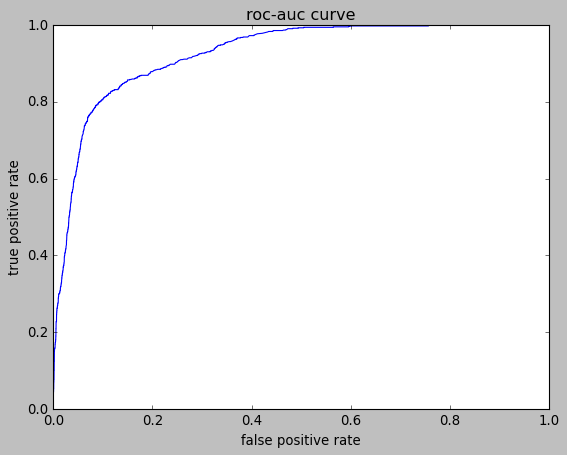

In [34]:
display_roc_auc(X_test,y_test,gb1)

Feature Importances:
 [8.16561069e-03 1.18018355e-03 4.45197233e-04 0.00000000e+00
 2.12604007e-03 1.26412078e-03 9.95437654e-03 4.84265275e-03
 3.28908067e-02 5.46548424e-02 3.49035626e-01 0.00000000e+00
 7.15711075e-04 0.00000000e+00 1.00700529e-04 0.00000000e+00
 6.28093920e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.16760307e-04 0.00000000e+00 3.53786742e-04
 1.83723701e-04 8.44238949e-05 8.02836792e-03 4.57716165e-03
 6.07423157e-03 5.58758656e-03 1.74292119e-03 9.98467733e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.29899973e-02
 0.00000000e+00 0.00000000e+00 1.95309964e-03 1.36136728e-03
 0.00000000e+00 0.00000000e+00 8.88094601e-04 2.51177172e-01
 1.56143605e-01 3.90061238e-03 9.28876849e-03 3.35926986e-02
 6.50391299e-03 0.00000000e+00 2.12441828e-02 0.00000000e+00
 0.00000000e+00 2.18928483e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.28247582e-04 0.00000000e+00 9.03085222e-04
 0

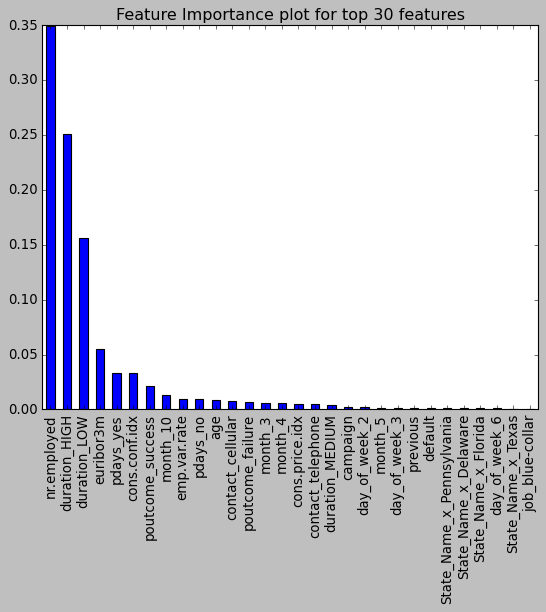

In [43]:
display_feature_importances(gb1)

### Gradient Boosting with sample weights
#### Sample weights are added for the class imbalance problem

In [51]:
from sklearn.utils.class_weight import compute_sample_weight

gb1_sw=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb1_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [53]:
gb1_sw.score(X_test,y_test)

0.8527706619927194

In [54]:
display_metrics(X_test,y_test,gb1_sw)

Confusion matrix:
 [[5610  975]
 [ 117  715]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.57       832

    accuracy                           0.85      7417
   macro avg       0.70      0.86      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8527706619927194


#### The f1-score remains the same adding the sample weights

ROC-AUC Score: 0.9266150670229543


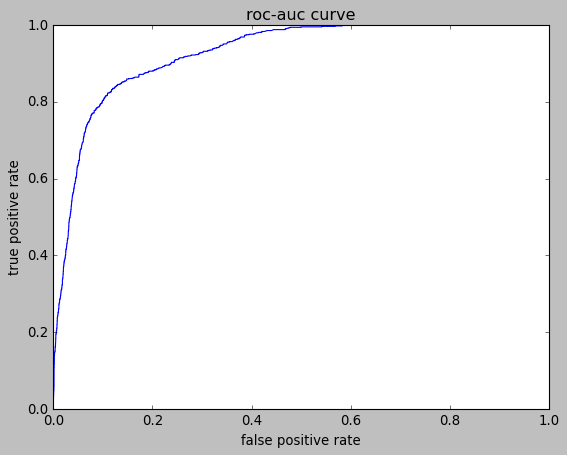

In [55]:
display_roc_auc(X_test,y_test,gb_sw)

### Oversampling

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26291, 1: 3376})
Number of rows after oversampling: Counter({0: 26291, 1: 26291})


In [47]:
gb1_os=GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,max_depth=5,random_state=400)
gb1_os.fit(xtrain_sm,ytrain_sm)

GradientBoostingClassifier(max_depth=5, n_estimators=60, random_state=400)

In [48]:
gb1_os.score(X_test,y_test)

0.9126331400835918

In [49]:
display_metrics(X_test,y_test,gb1_os)

Confusion matrix:
 [[6189  396]
 [ 252  580]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.59      0.70      0.64       832

    accuracy                           0.91      7417
   macro avg       0.78      0.82      0.80      7417
weighted avg       0.92      0.91      0.92      7417

Accuracy: 0.9126331400835918


#### The f1 score for class 1 increased from 59 to 64 with oversampling

### Undersampling

In [70]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
ns=NearMiss(0.8)

X_train_ns,y_train_ns=under_sampler.fit_resample(X_train,y_train)
print("The number of rows before undersampling {}".format(Counter(y_train)))
print("The number of rows after undersampling {}".format(Counter(y_train_ns)))

The number of rows before undersampling Counter({0: 26291, 1: 3376})
The number of rows after undersampling Counter({0: 3376, 1: 3376})


In [72]:
gb1_us=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb1_us.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [73]:
gb1_us.score(X_test,y_test)

0.851961709586086

In [74]:
display_metrics(X_test,y_test,gb1_us)

Confusion matrix:
 [[5609  976]
 [ 122  710]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.85      0.56       832

    accuracy                           0.85      7417
   macro avg       0.70      0.85      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.851961709586086


#### The f1 score for class 1 got reduced with oversampling

#### The highest f1 score of 63 for class 1 is got in oversampling with Gradient Boost

# XGBoost

In [56]:
xgb1=XGBClassifier(n_estimators=80,random_state=400)
xgb1.fit(X_train,y_train)

[13:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
xgb1.score(X_test,y_test)

0.914116219495753

In [59]:
display_metrics(X_test,y_test,xgb1)

Confusion matrix:
 [[6375  210]
 [ 427  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6585
           1       0.66      0.49      0.56       832

    accuracy                           0.91      7417
   macro avg       0.80      0.73      0.76      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.914116219495753


ROC-AUC Score: 0.9273259995035337


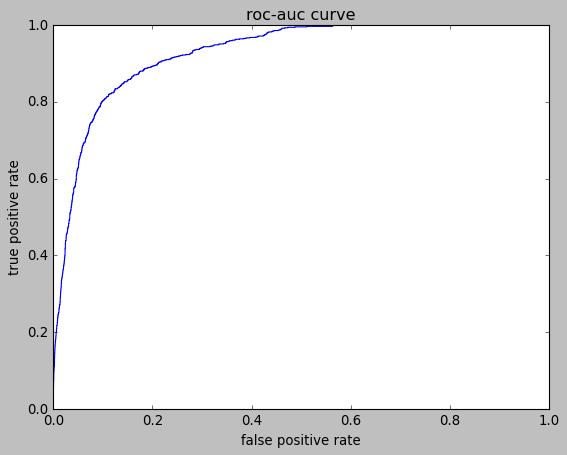

In [60]:
display_roc_auc(X_test,y_test,xgb1)

Feature Importances:
 [0.00415943 0.00681846 0.00402888 0.0044828  0.00393597 0.00454208
 0.0289373  0.00533917 0.01179643 0.00807294 0.2800353  0.0040037
 0.00615326 0.00435602 0.00437287 0.00415973 0.00644269 0.00331084
 0.00401253 0.00278474 0.00467392 0.00492314 0.00468239 0.00374202
 0.00422931 0.00349467 0.         0.00426657 0.00462509 0.00499649
 0.00954906 0.         0.00390852 0.00556548 0.01441484 0.00775677
 0.00475911 0.00302779 0.00447553 0.01944275 0.00436184 0.00291962
 0.0057306  0.00508166 0.00749075 0.003916   0.0057677  0.1310927
 0.08832645 0.00350053 0.0250606  0.         0.00715708 0.
 0.02227811 0.00270364 0.0041111  0.00441347 0.0039512  0.00528052
 0.0037048  0.00330515 0.0013682  0.00440397 0.00469987 0.00141878
 0.0033608  0.00316928 0.00463119 0.00244048 0.00470429 0.00303599
 0.00113113 0.00272579 0.00230357 0.00731025 0.00344381 0.00268064
 0.00349393 0.00192391 0.00269311 0.00164761 0.00145801 0.00517504
 0.00450838 0.00411218 0.00490006 0.         0.005

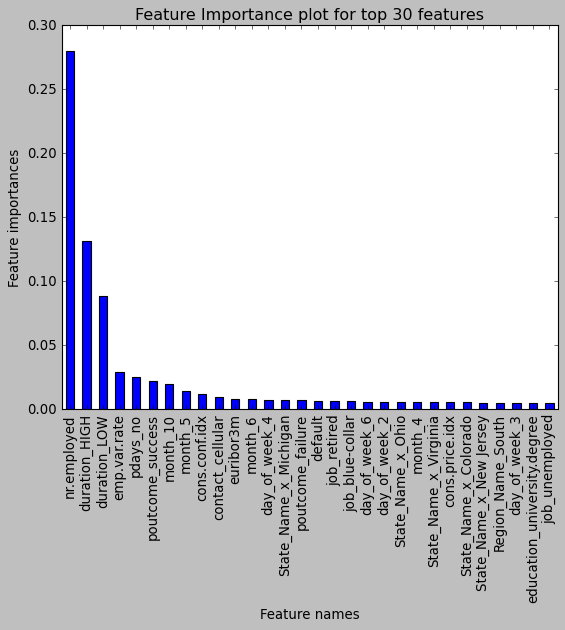

In [61]:
display_feature_importances(xgb1)

### XGBoost with sample weights
#### Sample weights are added for the class imbalance problem

In [63]:
from sklearn.utils.class_weight import compute_sample_weight

xgb1_sw=XGBClassifier(n_estimators=80,random_state=400)
xgb1_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

[13:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
xgb1_sw.score(X_test,y_test)

0.8766347579884051

In [66]:
display_metrics(X_test,y_test,xgb1_sw)

Confusion matrix:
 [[5831  754]
 [ 161  671]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6585
           1       0.47      0.81      0.59       832

    accuracy                           0.88      7417
   macro avg       0.72      0.85      0.76      7417
weighted avg       0.92      0.88      0.89      7417

Accuracy: 0.8766347579884051


#### The f1 score increased from 56 to 59 with sample weights

### Oversampling

In [67]:
xgb1_os=XGBClassifier(n_estimators=140,learning_rate=0.1,max_depth=3,min_child_weight=5,random_state=400)
xgb1_os.fit(xtrain_sm,ytrain_sm,sample_weight=compute_sample_weight(class_weight='balanced', y=ytrain_sm))

[13:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
xgb1_os.score(X_test,y_test)

0.9092625050559525

In [69]:
display_metrics(X_test,y_test,xgb1_os)

Confusion matrix:
 [[6165  420]
 [ 253  579]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.58      0.70      0.63       832

    accuracy                           0.91      7417
   macro avg       0.77      0.82      0.79      7417
weighted avg       0.92      0.91      0.91      7417

Accuracy: 0.9092625050559525


#### The f1 score for class 1 increased from 56 to 63 with oversampling

### Undersampling

In [75]:
xgb1_us=XGBClassifier(n_estimators=80,random_state=400)
xgb1_us.fit(X_train_ns,y_train_ns)

[15:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
xgb1_us.score(X_test,y_test)

0.8483214237562356

In [77]:
display_metrics(X_test,y_test,xgb1_us)

Confusion matrix:
 [[5585 1000]
 [ 125  707]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.41      0.85      0.56       832

    accuracy                           0.85      7417
   macro avg       0.70      0.85      0.73      7417
weighted avg       0.91      0.85      0.87      7417

Accuracy: 0.8483214237562356


#### The f1 score for class 1 got reduced to 56 with oversampling

#### The highest f1 score of 63 for class 1  63 is got in oversampling in XGBoost